## Nova Real Estate - Price Predictor

In [1]:
import pandas as pd

In [2]:
housing = pd.read_csv("data.csv")

In [3]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [4]:
#housing.info()

In [5]:
#housing['CHAS'].value_counts()

In [6]:
#housing.describe()

In [7]:
%matplotlib inline

In [8]:
#import matplotlib.pyplot as plt
#housing.hist(bins=60, figsize=(20, 20))

## Train-Test Splitting 

In [9]:
#for learning purpose
import numpy as np
def split_train_test(data, test_ratio):
    np.random.seed(42) #to fix the shuffled values
    shuffled = np.random.permutation(len(data)) #random shuffling of test data
    test_set_size = int(len(data) * test_ratio)
    test_indices = shuffled[:test_set_size]
    train_indices = shuffled[test_set_size:]
    return data.iloc[test_indices], data.iloc[train_indices]

In [10]:
#test_set, train_set = split_train_test(housing, 0.8) #4:1 ratio

In [11]:
#print(f"Rows in Test set: {len(test_set)}\nRows in Train set: {len(train_set)}")

In [12]:
#importing the pre_built split method from sklearn
from sklearn.model_selection import train_test_split
train_set, test_set = train_test_split(housing, test_size = 0.2, random_state = 42)
print(f"Rows in Test set: {len(test_set)}\nRows in Train set: {len(train_set)}")

Rows in Test set: 102
Rows in Train set: 404


In [13]:
#Distributing 0s and 1s of 'CHAS' column equally into train and test data
#For learning purpose only
from sklearn.model_selection import StratifiedShuffleSplit
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state = 42)
for train_index, test_index in split.split(housing, housing['CHAS']):
    strat_train_set = housing.loc[train_index]
    strat_test_set = housing.loc[test_index]

In [14]:
#strat_test_set['CHAS'].value_counts()

In [15]:
#strat_train_set['CHAS'].value_counts()

In [16]:
housing = strat_train_set.copy()

## Looking for Correlations(For better understanding the relation between the features selected)

In [17]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679487
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
LSTAT     -0.740494
Name: MEDV, dtype: float64

MEDV       1.000000
RM         0.695360
ZN         0.360445
B          0.333461
DIS        0.249929
CHAS       0.175260
AGE       -0.376955
RAD       -0.381626
CRIM      -0.388305
NOX       -0.427321
TAX       -0.468536
INDUS     -0.483725
PTRATIO   -0.507787
LSTAT     -0.737663
Name: MEDV, dtype: float64

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000190533F6C18>,
      dtype=object)

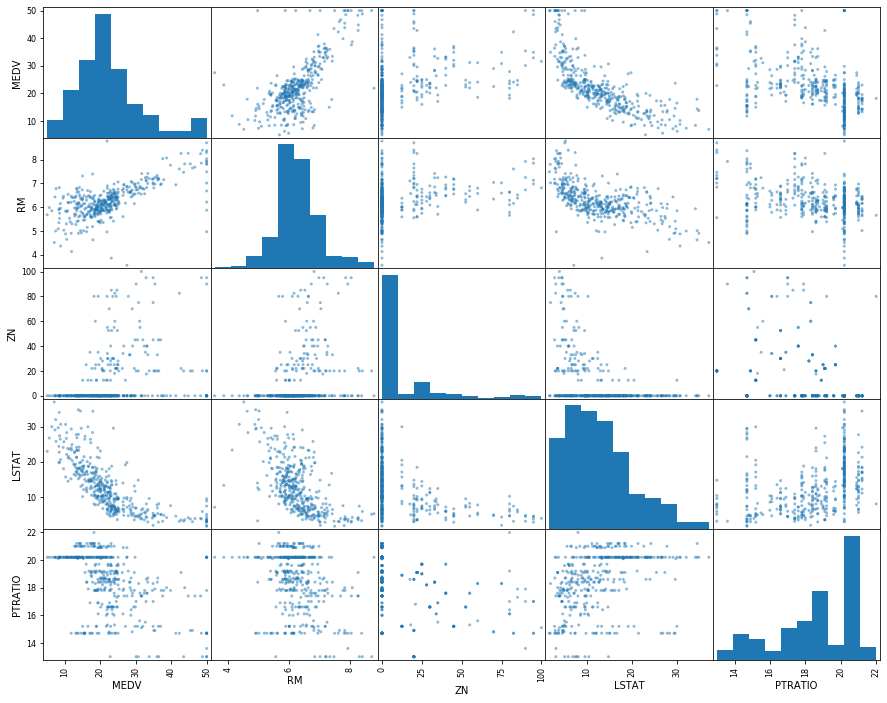

In [18]:
from pandas.plotting import scatter_matrix
attributes = ["MEDV", "RM", "ZN", "LSTAT", "PTRATIO"]
scatter_matrix(housing[attributes], figsize = (15, 12))

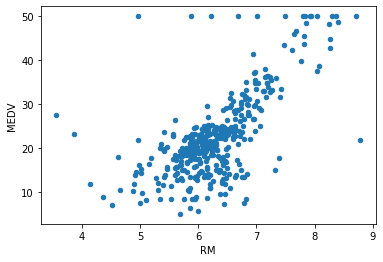

In [19]:
housing.plot(kind = "scatter", x = "RM", y = "MEDV")

## Trying out Attribute Combinations

In [20]:
housing["TAXRM"] = housing["TAX"]/housing["RM"]

In [21]:
housing.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV,TAXRM
254,0.04819,80.0,3.64,0,0.392,6.108,32.0,9.2203,1,315,16.4,392.89,6.57,21.9,51.571709
348,0.01501,80.0,2.01,0,0.435,6.635,29.7,8.3440,4,280,17.0,390.94,5.99,24.5,42.200452
476,4.87141,0.0,18.10,0,0.614,6.484,93.6,2.3053,24,666,20.2,396.21,18.68,16.7,102.714374
321,0.18159,0.0,7.38,0,0.493,6.376,54.3,4.5404,5,287,19.6,396.90,6.87,23.1,45.012547
326,0.30347,0.0,7.38,0,0.493,6.312,28.9,5.4159,5,287,19.6,396.90,6.15,23.0,45.468948


In [22]:
corr_matrix = housing.corr()
corr_matrix['MEDV'].sort_values(ascending=False)

MEDV       1.000000
RM         0.679487
B          0.361761
ZN         0.339741
DIS        0.240451
CHAS       0.205066
AGE       -0.364596
RAD       -0.374693
CRIM      -0.393715
NOX       -0.422873
TAX       -0.456657
INDUS     -0.473516
PTRATIO   -0.493534
TAXRM     -0.525980
LSTAT     -0.740494
Name: MEDV, dtype: float64

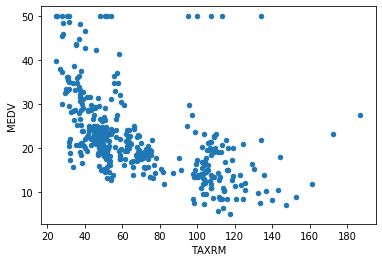

In [23]:
housing.plot(kind = "scatter", x = "TAXRM", y = "MEDV")

In [24]:
housing = strat_train_set.drop("MEDV", axis = 1)
housing_labels = strat_train_set["MEDV"].copy()

## Missing Attributes

To take care of the missing attributes, you have three options:
    1. Get rid of the missing data points
    2. Get rid of the whole attribute
    3. Set the value to 0, mean or median

In [25]:
#Option 1
a = housing.dropna(subset = ["RM"])
a.shape
#original housing dataframe will remain unchanged

(400, 13)

In [26]:
#option 2
housing.drop("RM", axis = 1).shape
#Note that there is no RM column, original housing dataframe will remain unchanged

(404, 12)

In [27]:
#Option 3
median = housing["RM"].median()
housing["RM"].fillna(median)
#original housing dataframe will remain unchanged

254    6.1080
348    6.6350
476    6.4840
321    6.3760
326    6.3120
411    6.6570
250    6.4870
100    6.7270
429    6.3800
57     6.8160
413    5.1550
115    5.9280
490    5.0930
199    6.9750
494    5.9260
142    5.4030
113    6.0920
468    5.9260
400    5.9870
247    6.2260
151    5.4040
408    5.6170
68     5.5940
365    3.5610
81     6.6190
93     6.2125
456    5.9760
116    6.1760
27     6.0470
234    6.7260
        ...  
433    6.4360
430    6.3480
479    6.2290
438    5.9350
38     5.9660
18     5.4560
97     8.0690
266    7.0140
133    5.8220
449    6.4170
477    5.3040
171    5.8800
180    7.7650
158    6.0660
279    6.8120
109    6.2290
82     6.3020
386    4.6520
418    5.9570
126    5.6130
446    6.3410
101    6.7810
277    6.8260
405    5.6830
367    3.8630
155    6.1520
423    6.1030
98     7.8200
455    6.5250
216    5.8880
Name: RM, Length: 404, dtype: float64

In [28]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy = "median")
imputer.fit(housing)

SimpleImputer(add_indicator=False, copy=True, fill_value=None,
              missing_values=nan, strategy='median', verbose=0)

In [29]:
X = imputer.transform(housing)

In [30]:
housing_tr = pd.DataFrame(X, columns = housing.columns)
housing_tr.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.602814,10.836634,11.344950,0.069307,0.558064,6.280782,69.039851,3.746210,9.735149,412.341584,18.473267,353.392822,12.791609
std,8.099383,22.150636,6.877817,0.254290,0.116875,0.711583,28.258248,2.099057,8.731259,168.672623,2.129243,96.069235,7.235740
min,0.006320,0.000000,0.740000,0.000000,0.389000,3.561000,2.900000,1.129600,1.000000,187.000000,13.000000,0.320000,1.730000
25%,0.086963,0.000000,5.190000,0.000000,0.453000,5.879750,44.850000,2.035975,4.000000,284.000000,17.400000,374.617500,6.847500
50%,0.286735,0.000000,9.900000,0.000000,0.538000,6.212500,78.200000,3.122200,5.000000,337.000000,19.000000,390.955000,11.570000
75%,3.731923,12.500000,18.100000,0.000000,0.631000,6.630000,94.100000,5.100400,24.000000,666.000000,20.200000,395.630000,17.102500
max,73.534100,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


## Scikit-learn Design

Primarily, three types of objects

Estimators - It estimates some parameter based on a dataset. Eg. imputer. It has a fit method and transform method. Fit method - Fits the dataset and calculates internal parameters

Transformers - transform method takes input and returns output based on the learnings from fit(). It also has a convenience function called fit_transform() which fits and then transforms.

Predictors - LinearRegression model is an example of predictor. fit() and predict() are two common functions. It also gives score() function which will evaluate the predictions.

## Feature Scaling

Primarily, two types of feature scaling methods:

Min-max scaling (Normalization) (value - min)/(max - min) Sklearn provides a class called MinMaxScaler for this

Standardization (value - mean)/std Sklearn provides a class called StandardScaler for this

## Creating a Pipeline

In [31]:
#To be able modify the code later without disturbing the dataset
#Here we are standardizing the values of every feature for better analysis
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
my_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy = "median")),
    #    ...... add as many as you jwant in your pipeline
    ('std_scaler', StandardScaler()),
])

In [32]:
housing_num_tr = my_pipeline.fit_transform(housing)
housing_num_tr

array([[-0.43942006,  3.12628155, -1.12165014, ..., -0.97491834,
         0.41164221, -0.86091034],
       [-0.44352175,  3.12628155, -1.35893781, ..., -0.69277865,
         0.39131918, -0.94116739],
       [ 0.15682292, -0.4898311 ,  0.98336806, ...,  0.81196637,
         0.44624347,  0.81480158],
       ...,
       [-0.43525657, -0.4898311 , -1.23083158, ..., -0.22254583,
         0.41831233, -1.27603303],
       [ 0.14210728, -0.4898311 ,  0.98336806, ...,  0.81196637,
        -3.15239177,  0.73869575],
       [-0.43974024, -0.4898311 ,  0.37049623, ..., -0.97491834,
         0.41070422,  0.09940681]])

## Selecting a desired model for Nova Real Estates

In [33]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor()
#model = DecisionTreeRegressor()
#model = LinearRegression()
model.fit(housing_num_tr, housing_labels)

C:\Users\Bumba\Anaconda3\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [34]:
some_data = housing.iloc[:5]
some_labels = housing_labels.iloc[:5]

In [35]:
prepared_data = my_pipeline.transform(some_data)

In [36]:
model.predict(prepared_data)

array([22.29, 25.41, 16.83, 23.36, 23.32])

In [37]:
list(some_labels)

[21.9, 24.5, 16.7, 23.1, 23.0]

## Evaluating the model

In [38]:
from sklearn.metrics import mean_squared_error
housing_predictions = model.predict(housing_num_tr)
mse = mean_squared_error(housing_labels, housing_predictions)
rmse = np.sqrt(mse)
rmse

1.625752529485565

## Using better evaluation technique - Cross Validation


In [39]:
# 1 2 3 4 5 6 7 8 9 10
from sklearn.model_selection import cross_val_score
scores = cross_val_score(model, housing_num_tr, housing_labels, scoring = "neg_mean_squared_error", cv = 10)
rmse_scores = np.sqrt(-scores)
rmse_scores

array([2.96050465, 2.83175891, 4.63431317, 2.86409225, 4.10316585,
       2.87679335, 4.48975361, 3.43495051, 3.16332697, 3.20814354])

In [40]:
def print_scores(scores):
    print("Scores: ", scores)
    print("Mean: ", scores.mean())
    print("Standard Deviation: ", scores.std())
    
print_scores(rmse_scores)

Scores:  [2.96050465 2.83175891 4.63431317 2.86409225 4.10316585 2.87679335
 4.48975361 3.43495051 3.16332697 3.20814354]
Mean:  3.4566802816316207
Standard Deviation:  0.6591243110433795


## Saving the model

In [41]:
from joblib import dump, load
dump(model, 'Nova.joblib')

['Nova.joblib']

## Testing the model on test data

In [43]:
X_test = strat_test_set.drop("MEDV", axis = 1)
Y_test = strat_test_set["MEDV"].copy()
X_test_prepared = my_pipeline.transform(X_test)
final_predictions = model.predict(X_test_prepared)
final_mse = mean_squared_error(Y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

3.0225403223116807

In [45]:
prepared_data[0]

array([-0.43942006,  3.12628155, -1.12165014, -0.27288841, -1.42262747,
       -0.24311502, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -0.86091034])

## Using the model 

In [80]:
from joblib import dump, load
#import numpy as np
model = load('Nova.joblib')
features = np.array([[-0.493942006,  3.12628155, -1.12965014, -0.27288841, -1.42262747,
       -0.04311502, -1.31238772,  2.61111401, -1.0016859 , -0.5778192 ,
       -0.97491834,  0.41164221, -1.09]])
model.predict(features)

array([23.93])